# Introduction to PyTorch

Credit: Jake Austin, CS182 Sp21 Course Staff

Here, we will learn about PyTorch, a framework that will allow us to quickly and easily use deep learning.

At the end of the day, **deep learning is just math** that we could implement with Numpy, but that would be gross and take forever, so we use libraries like PyTorch to abstract away the mathmatical details of deep learning, and use prebuilt tools for designing networks and training them without too much code.

Use Colab for this tutorial since the GPUs are free.

**We will assume proficiency with basic python and numpy**, as python is needed and PyTorch is very similar syntactically to numpy (see [here](https://colab.research.google.com/github/cs231n/cs231n.github.io/blob/master/python-colab.ipynb#scrollTo=Numpy) for a basic introduction to numpy and its syntax... and some basic python review).


### What is PyTorch?

PyTorch is a system that works exactly like numpy, except it keeps track on the fly of all the operations we do between Tensor objects (which behave like ndarrays). As you do operations, it will cache everything it needs to calculate arbitrary derivatives of any scalar function with respect to any element of any tensor that was used to calculate the scalar function (you will be able to calculate the derivative of anything with respect to anything). This is an enormous step up from the dinosaur days of having to calculate and plug in your own derivatives to layers of neural networks.

### Why?

* Small code footprint, but incredibly powerful
* Our code will now run on GPUs without having to write custom CUDA code
* PyTorch is used everywhere in research and in industry


## How will I learn PyTorch?

PyTorch has an excellent series of tutorials [here](https://pytorch.org/tutorials/).

Justin Johnson has made an excellent [tutorial](https://github.com/jcjohnson/pytorch-examples) for PyTorch.

You can also find the detailed [API doc](http://pytorch.org/docs/stable/index.html) here. In general the PyTorch documentation is incredibly comprehensive and should be referenced / searched wherever possible if you have a question on how some function works.


# Table of Contents

This assignment has 6 parts. We will start by talking about PyTorch and its similarities to numpy. We will then move on to talking about PyTorch's automatic differentiation. We will quickly go over how we load in datasets and use them. Then we will show 3 different levels of abstraction that can be used for creating different deep learning models.

1. Numpy / Torch
2. Automatic Differentiation
3. Datasets / Dataloaders / Augmentations
4. Barebones PyTorch (Low level network design)
5. nn.Module PyTorch (Middle level network design)
6. nn.Sequential PyTorch (High level network design)

Here is a table of comparison:

| API           | Flexibility | Convenience |
|---------------|-------------|-------------|
| Barebone      | High        | Low         |
| `nn.Module`     | High        | Medium      |
| `nn.Sequential` | Low         | High        |

# 1. Numpy / Torch

In this section we are going to show the similarities between numpy and PyTorch just to get you comfortable with PyTorch.

PyTorch is based around Tensor() objects. They behave exactly like numpy arrays in terms of what they are and what you can do with them. Just as basic ndarrays with floating point numbers are just higher dimensional generalizations of matrices, tensors are no different. Just like numpy, these tensors are created as the returned value from torch.tensor(data) where data is a (optionally nested) list of ints or floats, or even a ndarray from numpy!

Just like numpy, PyTorch has a lot of mathmatical functions we can do with tensors... addition, elementwise multiplication, matrix multiplication, etc.

This cannot be stressed enough, ignoring what's going on under the hood, tensors behave EXACTLY like ndarrays, so there is nothing to fear!

This similarity is demonstrated again in [this](https://pytorch.org/tutorials/beginner/basics/tensorqs_tutorial.html) PyTorch tutorial.

## Numpy PyTorch Similarities

In [ ]:
import numpy as np
import torch

Here is the most basic way to create tensors, just passing in nested lists. Here we will create the 2x2 identity matrix from a nested list.

In [ ]:
nested_list = [[1.,0.], [0., 1.]]
np_a = np.array(nested_list)
torch_a = torch.tensor(nested_list)


print('Matrix contents ------------------')
print('Numpy Array Contents and type:')
print('np array: \n', np_a, '\n', type(np_a), '\n', np_a.shape, '\n')
print('Torch Tensor Contents and type:')
print('torch tensor: \n', torch_a, '\n', type(np_a), '\n', torch_a.shape)


Matrix contents ------------------
Numpy Array Contents and type:
np array: 
 [[1. 0.]
 [0. 1.]] 
 <class 'numpy.ndarray'> 
 (2, 2) 

Torch Tensor Contents and type:
torch tensor: 
 tensor([[1., 0.],
        [0., 1.]]) 
 <class 'numpy.ndarray'> 
 torch.Size([2, 2])


We can index into these structures, and see that the indexing works the same way.

In [ ]:
print('Indexing at (i,j) = (1,1)')
print(np_a[1,1], type(np_a[1,1]))
print(torch_a[1,1], type(torch_a[1,1]))

Indexing at (i,j) = (1,1)
1.0 <class 'numpy.float64'>
tensor(1.) <class 'torch.Tensor'>


We can also reshape our arrays in similar ways too.

"View" is analogous to numpy's "reshape" method: it reshapes x's dimensions according to the arguments of the function.

As an example, say we want to take a tensor of shape 2x3x3 and reshape into a 2x9 tensor. The outputted tensor will have elements accordingly:

```python
input[0,0,0] == output[0,0]
input[0,0,1] == output[0,1]
input[0,0,2] == output[0,2] # After this, we increment on the next dimension
                            # of the input tensor since the last two dimensions
                            # are only 3 long
input[0,1,0] == output[0,3]
...
input[0,2,2] == output[0,8]
input[1,0,0] == output[1,0]
...
```

Basically, if you were to iterate over every element in the tensors (before and after reshaping) starting with the last dimensions first, the order of elements printed is the same for both tensors.

PyTorch additionally has .reshape available as a method, the difference being whether or not it is actually reshaped in memory.

In [ ]:
start = torch.zeros((2,3,3))
idx = 0
for i in range(start.shape[0]):
  for j in range(start.shape[1]):
    for k in range(start.shape[2]):
      start[i,j,k] = idx
      idx += 1
end = start.view(2,9)
print(start)
print()

print(start[0,0,0], end[0,0])
print(start[0,0,1], end[0,1])
print(start[0,0,2], end[0,2])
print(start[0,1,0], end[0,3])
print('...')
print(start[0,2,2], end[0,8])
print(start[1,0,0], end[1,0])
print('...')

tensor([[[ 0.,  1.,  2.],
         [ 3.,  4.,  5.],
         [ 6.,  7.,  8.]],

        [[ 9., 10., 11.],
         [12., 13., 14.],
         [15., 16., 17.]]])

tensor(0.) tensor(0.)
tensor(1.) tensor(1.)
tensor(2.) tensor(2.)
tensor(3.) tensor(3.)
...
tensor(8.) tensor(8.)
tensor(9.) tensor(9.)
...


We can see that these have the same types of operations associated with them. They all support + (addition), - (subtraction), * (elementwise multiplication), @ (matrix multiplication where the operands are matrices), and even truth operations like == and >=.

In [ ]:
data = [[1.,1.], [1.,1.]]
np_b = np.array(data)
torch_b = torch.tensor(data)

print('Matrix a\n', np_a, '\nMatrix b\n', np_b, '\n')

print('Addition (a + b) ----------------------')
print(np_a + np_b)
print(torch_a + torch_b)
print()

print('Subtraction (a - b) ----------------------')
print(np_a - np_b)
print(torch_a - torch_b)
print()

print('Elementwise Multiplication (a * b) ----------------------')
print(np_a * np_b)
print(torch_a * torch_b)
print()

print('Matrix Multiplication (a @ b) ----------------------')
print(np_a @ np_b)
print(torch_a @ torch_b)
print()


Matrix a
 [[1. 0.]
 [0. 1.]] 
Matrix b
 [[1. 1.]
 [1. 1.]] 

Addition (a + b) ----------------------
[[2. 1.]
 [1. 2.]]
tensor([[2., 1.],
        [1., 2.]])

Subtraction (a - b) ----------------------
[[ 0. -1.]
 [-1.  0.]]
tensor([[ 0., -1.],
        [-1.,  0.]])

Elementwise Multiplication (a * b) ----------------------
[[1. 0.]
 [0. 1.]]
tensor([[1., 0.],
        [0., 1.]])

Matrix Multiplication (a @ b) ----------------------
[[1. 1.]
 [1. 1.]]
tensor([[1., 1.],
        [1., 1.]])


We even have some of the same math operations. Not all of them share the same function names, but these ones do. Torch also has a linear algebra library just like numpy, which we will show here. Below are norm and inverse shown, but just like numpy, torch has everything from QR decomp to SVD to solving systems of linear equations.

In [ ]:
print('Norm -------------------------')
print(np.linalg.norm(np_a))
print(torch.linalg.norm(torch_a))
print()

print('Inverse ---------------------')
print(np.linalg.inv(np_a))
print(torch.linalg.inv(torch_a))

Norm -------------------------
1.4142135623730951
tensor(1.4142)

Inverse ---------------------
[[1. 0.]
 [0. 1.]]
tensor([[1., -0.],
        [0., 1.]])


Finally, we can also convert back and forth between tensors and ndarrays. We can call torch.tensor() on an ndarray to get a tensor, or call the .numpy() function of a tensor to get the numpy version of the tensor.

In [ ]:
print(torch.tensor(np_a))
print(torch_a.numpy())

tensor([[1., 0.],
        [0., 1.]], dtype=torch.float64)
[[1. 0.]
 [0. 1.]]


## Devices

Here is one of the major differences between torch and numpy: gpu usage. In the code block below, we will define a device by simply creating an object from calling torch.device('cuda') or torch.device('cpu'). These objects can be passed into new tensors that we create, storing them on the corresponding devices. You can also move around existing tensors to these devices by using the .to() function, calling a.to(device) on tensor a with your device object called device.

You have an option to **use GPU by setting the flag to True below**. It is recommended, but not necessary to use GPU for this assignment. Note that if your computer does not have CUDA enabled, `torch.cuda.is_available()` will return False and this notebook will fallback to CPU mode. The global variables `dtype` and `device` will control the data types throughout this assignment.

If you are using Colab, you need to manually switch to a GPU device. You can do this by clicking `Runtime -> Change runtime type` and selecting `GPU` under `Hardware Accelerator`. Note that you have to rerun the cells from the top since the kernel gets restarted upon switching runtimes.

In [ ]:
USE_GPU = True

dtype = torch.float32 # we will be using float throughout this tutorial

if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

# Constant to control how frequently we print train loss
print_every = 100

print('using device:', device)

using device: cuda


Here we see a tensor created with a device from the get go, and another example where we send an existing tensor to a device. If you indeed do have a gpu, you should see 'cuda:0' listed as the device. **The last example shouldn't work in sending the tensor to the device because the .to() call returns the object being stored on the new device... the .to() operation isn't an 'in place' operation!**

You will be using the .to() function on networks and tensors down the line to send your networks and your data to the best device you can, allowing all this work to be done on a GPU for faster executions!

In [ ]:
a = torch.randn((2, 2), device = device)
print(a, a.device)

a = torch.randn((2, 2))
a = a.to(device)
print(a, a.device)

a = torch.randn((2, 2))
a.to(device)
print(a, a.device)

tensor([[ 0.8511, -1.5456],
        [-1.3076, -0.7988]], device='cuda:0') cuda:0
tensor([[ 0.5741, -0.6882],
        [-0.9032, -1.1002]], device='cuda:0') cuda:0
tensor([[ 1.2011,  0.7615],
        [ 1.1613, -0.6530]]) cpu


The following cell will error if your device is a gpu. This is because tensors not on the same device cannot be operated on together. This makes sense, because how on earth are you going to do an arithmatic operation on tensors that are on separate hardware?

Let this be a cautionary tale down the line when you train your networks: if your network is on a GPU, make sure you send your batches of data to the gpu as well.

In [ ]:
torch.randn((2, 2), device = device) + torch.randn((2, 2))

RuntimeError: ignored

# 2.  PyTorch Autograd

We have shown that on the surface, torch tensors have the same functionality as numpy arrays, but under the hood, there is so much more going on! **We can specify that we want to be able to take derivatives with respect to elements of this tensor evaluated at specific points.** While torch won't be spitting out symbolic derivatives like f(x) = xw^2 ==> df/dw = 2wx, it will allow us to evaluate df/dw at a specific value of x for a specific value of w, which is all we need for deep learning.

**Please note that the only syntactical thing you should come away from this portion with is that a.backward() will calculate the partial derivatives of every tensor with respect to a.** You will never have to go in and look at what a tensor's .grad attribute is... we will always be using objects that will handle all our gradient updates for us. The .float() casting is probably useful to know as well.

For a specific pytorch tutorial on this subject of automatic differentiation, see [here](https://pytorch.org/tutorials/beginner/basics/autogradqs_tutorial.html).

In [ ]:
import torch

Here we will start with a basic function, f(x,w) = xw^2. We will first set our value for w that we want to evaluate the derivative of f at.

Since the derivative in question that we are interested in is of f(x,w) with respect to w, we will need to specify to torch that we want to be able to evaluate the derivative of this tensor. We do this by setting the tensor's .requires_grad field to True.


In [ ]:
w = torch.tensor(5)
w.requires_grad = True

Oh no! This is to be expected. Torch is telling us that in order to be able to differentiate with respect to something, that thing has to be a floating point number. This makes sense, because the derivative only works in a coninuous space and integers are discrete.

This is an issue that will crop up and give you all kinds of trouble if you aren't careful, especially since we frequently load in images where pixel values are from 0-255 and of type int.

Just to be safe it is often a good idea just to cast things if you aren't certain what their type is.

In [ ]:
w = w.float()
w.requires_grad = True

x = torch.tensor(4)

Now we will evaluate y = f(x,w) with our tensors. The magical thing about pytorch is that we really only need to specify how to evaluate the function, and pytorch takes care of the rest, and will be able to evaluate derivatives on its own with no help! So, we will go ahead and evaluate

In [ ]:
y = x * (w ** 2)
print(y, type(y))

tensor(100., grad_fn=<MulBackward0>) <class 'torch.Tensor'>


You can see that f(x,w) has been evaluated correctly, since x = 4 and w = 5. We can also see a grad_fn field in the tensor. It's not important what this is, but it should be clear that pytorch is already ahead of the curve, and stashing everything it needs to calculate derivatives. We can go ahead and ask it to compute derivatives with the .backward() function.

The a.backward() function tells pytorch to go ahead and take the derivatives of a with respect to all the tensors that we used to create a. The outputs will be stashed in the tensors' .grad fields.

More generally in the context of backpropagating for neural networks, **the a.backward() method only makes sense if the tensor a contains only a single scalar as opposed to a vector or matrix, otherwise you are computing the derivative of a vector or matrix with respect to our scalar weight, which outputs a vector or matrix, and not a scalar.** Since our weights are scalars, we want the derivatives of our loss with respect to our weights to be scalars so that we can perform a gradient step. This is why when doing batched gradient descent, you will be averaging the loss across training examples, bringing us to a single scalar loss for that batch that we can backpropagate on.

In [ ]:
y.backward()
print(w.grad)

tensor(40.)


Yay! This is what we should expect since df/dw = 2wx, which is 40 when w = 5 and x = 4. Don't expect these gradients to stay there forever if you start backpropagating again back onto x though. Let's see what happens if we run the same cell again

In [ ]:
y = x * (w ** 2)
y.backward()
print(w.grad)

tensor(80.)


What happened?!?!?! **What is happening here is that when pytorch calculates the derivative of x with respect to y, it doesn't just overwrite the .grad attribute, it actually adds to it in place.** Our .grad attribute was 40, and when we did another backward pass, the new derivative was 40, but instead of writing a new 40 in the .grad attribute, pytorch adds. **This is why after each batch you will run and backpropagate on, you make sure to clear you gradients.** We will tell you how to do this later on, but let this be a cautionary tale to clear your gradients between gradient steps nontheless.

This is something that is useful when performing "gradient accumulation" (out of scope for now, but something worth googling eventually).

More generally, we can actually create any function f which takes in arbitrary parameters, and still backpropagate from the output of the function to the inputs. Let's illustrate by creating a function called f which is our quadratic from earlier, but know you can truly create any function so long as the operations inside are differentiable.

In [ ]:
w.grad.zero_()

def f(w, x):
  return x * (w**2)


y = f(w, x)
y.backward()
print(w.grad)

tensor(40.)


At this point, you can use pytorch to calculate arbitrary derivatives evaluated at arbitrary values. We recommend you go toy with this to ensure you feel confident with this.

PyTorch has a nice tutorial that shows a more complex example with diagrams to go along with it, and states in greater detail how it goes about keeping track of computations [here](https://pytorch.org/tutorials/beginner/basics/autogradqs_tutorial.html), and I recommend you check it out.

# 3. Datasets and Dataloading

One of the critical parts of training neural networks is dealing with data and knowing how to augment / transform it.

We will be using the torch.utils.data for the core of our dataloading, using it to create datasets and dataloaders, but the library torchvision (part of the pytorch project, but specifically for computer vision) will also be used for our transforms and for premade computer vision dataset code.

The official torch intro to datasets and dataloaders is [here](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html) and the list of transforms in torchvision is [here](https://pytorch.org/vision/stable/transforms.html).


In [ ]:
# Some misc imports used for demonstrations
import matplotlib.pyplot as plt

# What we actually need for this to work
import torch
from torch.utils.data import Dataset, DataLoader, sampler
import torchvision.datasets as datasets
import torchvision.transforms as T

## Datasets

A dataset in PyTorch is any class inheriting from torch.utils.data.Dataset, and you need to overwrite 3 fields:
1. ``` __init___(self, ...):``` This is the initialization function, and it will be where you can pass in whatever kwargs you want, it doesn't matter so long as you have self, of course. Save all the information from the kwargs here so it will be very easy to fetch data later down the line.
2. ``` __len__(self): ``` Here, you simply need to return the length of the dataset (ie: the number of examples in the datasets)
3. ``` __getitem__(self, idx):``` This is the meat of the dataset. This is a function that must take in self and idx, nothing else. Idx will be an integer between 0 and the length of your dataset. Here, you should be returning the tensor corresponding to the idx-th training example (transformed / augmented if you so desire), any any other data you may want like a label for the data. Most of the time for image data, this involves opening an image file, converting it to a tensor, and outputting the image and label.

Below is what your dataset will look like written out in skeleton code.


In [ ]:
class custom_dataset(Dataset):
  def __init__(self, **kwargs):
    pass # Insert your code here to initialize the dataset, load up what you need and
  def __getitem__(self, idx):
    pass # Figure out how to load up and return the item in the dataset
    return x, label, other_misc_information_you_may_want
  def __len__(self):
    pass # Return the length of the dataset

Let's make a toy dataset where (x, y) pairs are (x, sin(x)) respectivley... meaning our dataset is just inputs and outputs of the sin function.

In [ ]:
class sin_dataset(Dataset):
  def __init__(self, num_examples, x_range):
    """
    Documentation here:
    num_examples is the number of examples we want this dataset to have
    x_range is a tuple of (lowest_possible_x, highest_possible_x)
    """
    self.num_examples = num_examples
    # torch.rand(shape) outputs tensor with shape shape where entries are uniformly distributed
    self.x_vals = (torch.rand(num_examples) * (x_range[1] - x_range[0])) + x_range[0]
  def __getitem__(self, idx):
    return self.x_vals[idx], torch.sin(self.x_vals[idx])
  def __len__(self):
    return self.num_examples

We can index into this dataset directly once we instantiate a sin_dataset object, and can even iterate over it.

This creates a super convenient way to pass data around, adding a nice structured abstraction to the process of getting and loading in data.

0-th entry (tensor(1.6187), tensor(0.9989))
1-th entry (tensor(-1.3866), tensor(-0.9831))


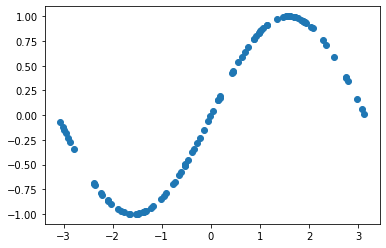

In [ ]:
torch.manual_seed(1)  # Setting the seed just for reproduceability... can remove this if you want
ds = sin_dataset(100, (-torch.pi, torch.pi))

print('0-th entry', ds[0])
print('1-th entry', ds[1])

xs = []
ys = []
for x, y in ds:
  xs.append(x)
  ys.append(y)

plt.scatter(xs, ys)
plt.show()

## Dataloaders

Lets now lean about dataloaders. They simply wrap our dataset objects and batch our data for us, shuffling for us if we want. They use multiprocessing under the hood to fetch our data quickly for us, providing one further abstraction away from our data loading process by allowing us to now directly request batches of data.

PyTorch's base DataLoader() will automatically batch things for us. If our dataset spits out 4 tensors in the getitem(self, idx) function, then the dataloader with spit out (in the same order) 4 batched tensors of, where an extra dimension (the batch dimension) is added as the first dimension.

In the case of images, if your images are of size CxHxW (channels in image, width, height), the dataloader will spit out a batch of size NxCxHxW where batch[i] is our ith training example in the batch (since we indexed along the first dimension which is the batch dimension)

We will not be covering how to create your own dataloader since so long as you are returning tensors, no matter how many, pytorch will get the batching right. For more complex data being returned by datasets other than raw tensors, you may have to make your own batching functions.


In [ ]:
loader = DataLoader(ds, batch_size=10, shuffle=False)

batch_x, batch_y = next(iter(loader))
print('Batched x', batch_x)
print('Batched y', batch_y)


for i, (x, y) in enumerate(ds): # enumerate just spits out the output of the iterable it is wrapping and the number of iterations done
  if i >= 10: # We only want the first 10
    break
  print('Example ' + str(i) + '     ', 'x: ', x, '    y: ', y)



Batched x tensor([ 1.6187, -1.3866, -0.6090,  1.4746, -2.9576,  1.8841, -0.6463,  1.5983,
         0.4367, -0.3847])
Batched y tensor([ 0.9989, -0.9831, -0.5721,  0.9954, -0.1829,  0.9513, -0.6022,  0.9996,
         0.4230, -0.3753])
Example 0      x:  tensor(1.6187)     y:  tensor(0.9989)
Example 1      x:  tensor(-1.3866)     y:  tensor(-0.9831)
Example 2      x:  tensor(-0.6090)     y:  tensor(-0.5721)
Example 3      x:  tensor(1.4746)     y:  tensor(0.9954)
Example 4      x:  tensor(-2.9576)     y:  tensor(-0.1829)
Example 5      x:  tensor(1.8841)     y:  tensor(0.9513)
Example 6      x:  tensor(-0.6463)     y:  tensor(-0.6022)
Example 7      x:  tensor(1.5983)     y:  tensor(0.9996)
Example 8      x:  tensor(0.4367)     y:  tensor(0.4230)
Example 9      x:  tensor(-0.3847)     y:  tensor(-0.3753)


What we did here is create an iterable from our dataloader by calling iter(loader). We then took the first element of that by calling next() and it spat out 2 tensors: a batched version of our first 10 x values and a batched version of our first 10 y values. The order is the same and the values are themselves unchanged as we can confirm by printing out the first 10 elements from our ds by hand.

In your training loops, you will iterate over your dataloader by doing something like this

```python
for x, label in train_loader:
  pass # Insert one step of gradient descent here
```

We can also notice that our dataloader spat out tensors of shape [10], whereas our ds tensors were of shape []. Clearly, an extra batch dimension was added.

## Image Transforms (Computer Vision Nerds Only)

One last thing you should know how to do (before we load up a real dataset and move on) is transform images. For this we use the transforms defined in torchvision.transforms. These will be objects that are callable on some data, returning that data after being transformed.

Below we have an example of a basic transform: the ToTensor transform. This is an object that will be able to take in numpy arrays and spit out tensors with the same elements and shape.

In [ ]:
transform = T.ToTensor()

test = np.eye(10)
print('This is the original np array')
print(type(test))
print(test, '\n\n')

transformed = transform(test)
print('This is the transformed array')
print(type(transformed))
print(transformed)

This is the original np array
<class 'numpy.ndarray'>
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]] 


This is the transformed array
<class 'torch.Tensor'>
tensor([[[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]]], dtype=torch.float64)


You can see what we did and how this worked. We take the transform object we instantiate, and then essentially call the object on the data we want to transform. A little off the wall, but also pretty straightforward. We can do this with a whole host of transforms in the torchvision library found [here](https://pytorch.org/vision/stable/transforms.html). One just needs to be careful because some transforms (like ToTensor) only accept numpy arrays as inputs, while other transforms only accept tensor objects as inputs (this is also true of the extra library of transforms called Albumentations mentioned earlier). We will compose them in the example shown below, using transforms.Compose. For computer vision tasks, it is very useful to define image augmentations using the torchvision.transforms class in this way.

--2022-11-15 00:47:44--  https://upload.wikimedia.org/wikipedia/commons/c/c5/Peacock_Plumage.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 103.102.166.240, 2001:df2:e500:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|103.102.166.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1972892 (1.9M) [image/jpeg]
Saving to: ‘image.jpg’

image.jpg           100%[===================>]   1.88M  --.-KB/s    in 0.06s   

2022-11-15 00:47:45 (29.1 MB/s) - ‘image.jpg’ saved [1972892/1972892]




This is our starting image


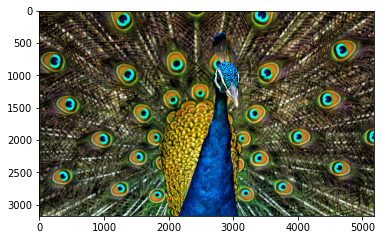

/usr/local/lib/python3.7/dist-packages/torchvision/transforms/functional.py:150: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:172.)
  img = torch.from_numpy(pic.transpose((2, 0, 1))).contiguous()


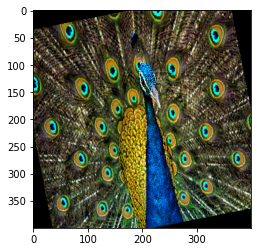

torch.Size([3, 400, 400])


In [ ]:
# This gets us a dummy image to use
!wget -O image.jpg https://upload.wikimedia.org/wikipedia/commons/c/c5/Peacock_Plumage.jpg


img_as_np = plt.imread('image.jpg')

print('\n\n\nThis is our starting image')
plt.imshow(img_as_np)
plt.show()

transform = T.Compose([
                       T.ToTensor(),
                       T.Resize((400, 400)),
                       T.RandomRotation(degrees=20)
])

output_tensor = transform(img_as_np)

plt.imshow(output_tensor.permute(1,2,0).numpy())
plt.show()
print(output_tensor.shape)




Here, you can see our starting image, and the image after it has been passed through our transform, and then put back as a numpy array. We first made it a tensor, then resized it to 400x400, and then rotated it randomly 20 degrees, then printed it back out.

--Aside--

You may notice that we needed to pass in output_tensor.permute(1,2,0) before taking it as a numpy array. This is because in PyTorch, it is convention to have an image be represented with dimensions corresponding to CxHxW, whereas in matplotlib, PIL, and a few other vision libraries, it is convention to represent images with dimensions HxWxC, so we needed to use permute to reorder the dimensions before printing it out.

One last aside: We won't cover it in this specific notebook, but for your own reading, there is a fantastic library of computer vision transforms called Albumentations [here](https://albumentations.ai/docs/getting_started/transforms_and_targets/) which is one of the nicest libraries for image transforms, especially when you need to randomly augment an image AND corresponding keypoints in an image. For basic classification tasks where augmenting our data shouldn't change the prediction (ie: classification tasks), the basic torchvision transforms will be sufficient.

## Prefab Dataset

We also have lots of premade datasets that we can fetch with torchvision (see [here](https://pytorch.org/vision/stable/datasets.html) for a full list of datasets). Some of these allow us to download the data directly, but in other cases like with imagenet, you will have to supply the data yourself. Below, we are going to use this to download the CIFAR-10 dataset.

As a note: we are using computer vision datasets here, but in addition to torchvision, PyTorch also has libraries like torchaudio which have similar prefab datasets, so depending on your specialty, you may want to check out those specific libraries in depth on your own.

In [ ]:
NUM_TRAIN = 49000

# Here we set up a transform to
# preprocess the data by subtracting the mean RGB value and dividing by the
# standard deviation of each RGB value; we've hardcoded the mean and std.
# If we want to add data augmentations, torchvision also offers different
# transformations that we can compose in here, though we would need to be sure
# to have two sets of transformations: one with data augmentation for the
# training loaders, and one without for the test and validation sets.
transform = T.Compose([
                T.ToTensor(),
                T.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
            ])

# We set up a Dataset object for each split (train / val / test); Datasets load
# training examples one at a time, so we wrap each Dataset in a DataLoader which
# iterates through the Dataset and forms minibatches. We divide the CIFAR-10
# training set into train and val sets by passing a Sampler object to the
# DataLoader telling how it should sample from the underlying Dataset.
# You could also just take subsets of the dataset to pass into separate dataloaders
# in order to create your train and test splits
cifar10_train = datasets.CIFAR10('./datasets', train=True, download=True,
                             transform=transform)
loader_train = DataLoader(cifar10_train, batch_size=64,
                          sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN)))

cifar10_val = datasets.CIFAR10('./datasets', train=True, download=True,
                           transform=transform)
loader_val = DataLoader(cifar10_val, batch_size=64,
                        sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN, 50000)))

cifar10_test = datasets.CIFAR10('./datasets', train=False, download=True,
                            transform=transform)
loader_test = DataLoader(cifar10_test, batch_size=64)

In [ ]:
next(iter(loader_train))

# 4. Barebones PyTorch

Now you know what torch is on a basic level (like numpy), you've had a chance to see how torch automatically can calculate derivatives for us, and you know how to load in data, so all that is left is to show you how to build networks!

PyTorch ships with high-level APIs to help us define model architectures conveniently, which we will cover in Part II of this tutorial. In this section, we will start with the barebone PyTorch elements to understand the autograd engine better. After this exercise, you will come to appreciate the high-level model API more.

We will start with a simple fully-connected ReLU network with two hidden layers and no biases for CIFAR classification.
This implementation computes the forward pass using operations on PyTorch Tensors, and uses PyTorch autograd to compute gradients.

In [ ]:
import torch
import torch.nn as nn

import torch.nn.functional as F  # useful stateless functions

## PyTorch Tensors: Flatten Function
Just as we defined transforms above, we will define a sort of transform here that will get us from an image tensor into a single vector for our fully connected network, simply by flattening out the HxWxC image into a vector of length == H\*W\*C

In [ ]:
def flatten(x):
    N = x.shape[0] # read in N, C, H, W
    return x.view(N, -1)  # "flatten" the C * H * W values into a single vector per image



x = torch.arange(12).view(2, 1, 3, 2)
print('Before flattening: ', x)
print('After flattening: ', flatten(x))



## Barebones PyTorch: Two-Layer Network

Here we define a function `two_layer_fc` which performs the forward pass of a two-layer fully-connected ReLU network on a batch of image data. After defining the forward pass we check that it doesn't crash and that it produces outputs of the right shape by running zeros through the network.



In [ ]:
def two_layer_fc(x, params):
    """
    A fully-connected neural networks; the architecture is:
    NN is fully connected -> ReLU -> fully connected layer.
    Note that this function only defines the forward pass;
    PyTorch will take care of the backward pass for us.

    The input to the network will be a minibatch of data, of shape
    (N, d1, ..., dM) where d1 * ... * dM = D. The hidden layer will have H units,
    and the output layer will produce scores for C classes.

    Inputs:
    - x: A PyTorch Tensor of shape (N, d1, ..., dM) giving a minibatch of
      input data.
    - params: A list [w1, w2] of PyTorch Tensors giving weights for the network;
      w1 has shape (D, H) and w2 has shape (H, C).

    Returns:
    - scores: A PyTorch Tensor of shape (N, C) giving classification scores for
      the input data x.
    """
    # first we flatten the image
    x = flatten(x)  # shape: [batch_size, C x H x W]

    w1, w2 = params

    # Forward pass: compute predicted y using operations on Tensors. Since w1 and
    # w2 have requires_grad=True, operations involving these Tensors will cause
    # PyTorch to build a computational graph, allowing automatic computation of
    # gradients. Since we are no longer implementing the backward pass by hand we
    # don't need to keep references to intermediate values.
    # you can also use `.clamp(min=0)`, equivalent to F.relu()
    x = F.relu(x.mm(w1))
    x = x.mm(w2)
    return x


hidden_layer_size = 42
x = torch.zeros((64, 50), dtype=dtype)  # minibatch size 64, feature dimension 50
w1 = torch.zeros((50, hidden_layer_size), dtype=dtype)
w2 = torch.zeros((hidden_layer_size, 10), dtype=dtype)
scores = two_layer_fc(x, [w1, w2])
print(scores.size())  # you should see [64, 10]



## Barebones PyTorch: Initialization
Let's write a couple utility methods to initialize the weight matrices for our models.

- `random_weight(shape)` initializes a weight tensor with the Kaiming normalization method.
- `zero_weight(shape)` initializes a weight tensor with all zeros. Useful for instantiating bias parameters.

The `random_weight` function uses the Kaiming normal initialization method, described in:

He et al, *Delving Deep into Rectifiers: Surpassing Human-Level Performance on ImageNet Classification*, ICCV 2015, https://arxiv.org/abs/1502.01852

Notice that we are setting the device of the instantiated tensors to be our device from earlier... this will allow execution on the GPU, but we will need to make sure that all the data we use is also on the GPU or it will error!

In [ ]:
def random_weight(shape):
    """
    Create random Tensors for weights; setting requires_grad=True means that we
    want to compute gradients for these Tensors during the backward pass.
    We use Kaiming normalization: sqrt(2 / fan_in)
    """
    if len(shape) == 2:  # FC weight
        fan_in = shape[0]
    else:
        fan_in = np.prod(shape[1:]) # conv weight [out_channel, in_channel, kH, kW]
    # randn is standard normal distribution generator.
    w = torch.randn(shape, device=device, dtype=dtype) * np.sqrt(2. / fan_in)
    w.requires_grad = True
    return w

def zero_weight(shape):
    return torch.zeros(shape, device=device, dtype=dtype, requires_grad=True)

# create a weight of shape [3 x 5]
# you should see the type `torch.cuda.FloatTensor` if you use GPU.
# Otherwise it should be `torch.FloatTensor`
random_weight((3, 5))

## Barebones PyTorch: Check Accuracy
When training the model we will use the following function to check the accuracy of our model on the training or validation sets.

When checking accuracy we won't need to compute any gradients; as a result we don't need PyTorch to build a computational graph for us when we compute scores. To prevent a graph from being built we scope our computation under a `torch.no_grad()` context manager, which will save some computation.

In [ ]:
def check_accuracy_part2(loader, model_fn, params):
    """
    Check the accuracy of a classification model.

    Inputs:
    - loader: A DataLoader for the data split we want to check
    - model_fn: A function that performs the forward pass of the model,
      with the signature scores = model_fn(x, params)
    - params: List of PyTorch Tensors giving parameters of the model

    Returns: Nothing, but prints the accuracy of the model
    """
    split = 'val' if loader.dataset.train else 'test'
    print('Checking accuracy on the %s set' % split)
    num_correct, num_samples = 0, 0
    with torch.no_grad():
        for x, y in loader:
            x = x.to(device=device, dtype=dtype)  # move to device, e.g. GPU
            y = y.to(device=device, dtype=torch.int64)
            scores = model_fn(x, params)
            _, preds = scores.max(1)
            num_correct += (preds == y).sum()
            num_samples += preds.size(0)
        acc = float(num_correct) / num_samples
        print('Got %d / %d correct (%.2f%%)' % (num_correct, num_samples, 100 * acc))

## BareBones PyTorch: Training Loop
We can now set up a basic training loop to train our network. We will train the model using stochastic gradient descent without momentum.

The last piece of the puzzle we need is a loss function. Here, we will use `torch.functional.cross_entropy` to compute the loss; you can [read about it here](http://pytorch.org/docs/stable/nn.html#cross-entropy). Cross entropy is the go to loss function for multi-way classification, as opposed to MSE which tends to work better in regression tasks. Cross entropy in pytorch will take the softmax of our model's outputs for us

The training loop takes as input the neural network function, a list of initialized parameters (`[w1, w2]` in our example), and learning rate.

In [ ]:
def train_part2(model_fn, params, learning_rate):
    """
    Trains a model on CIFAR-10 for a single epoch.

    Inputs:
    - model_fn: A Python function that performs the forward pass of the model.
      It should have the signature scores = model_fn(x, params) where x is a
      PyTorch Tensor of image data, params is a list of PyTorch Tensors giving
      model weights, and scores is a PyTorch Tensor of shape (N, C) giving
      scores for the elements in x.
    - params: List of PyTorch Tensors giving weights for the model
    - learning_rate: Python scalar giving the learning rate to use for SGD

    Returns: Nothing
    """
    # Makes one pass through the training set
    for t, (x, y) in enumerate(loader_train):
        # Move the data to the proper device (GPU or CPU)
        x = x.to(device=device, dtype=dtype)
        y = y.to(device=device, dtype=torch.long)

        # Forward pass: compute scores and loss
        scores = model_fn(x, params)
        loss = F.cross_entropy(scores, y)

        # Backward pass: PyTorch figures out which Tensors in the computational
        # graph has requires_grad=True and uses backpropagation to compute the
        # gradient of the loss with respect to these Tensors, and stores the
        # gradients in the .grad attribute of each Tensor.
        loss.backward()

        # Update parameters. We don't want to backpropagate through the
        # parameter updates, so we scope the updates under a torch.no_grad()
        # context manager to prevent a computational graph from being built.
        with torch.no_grad():
            for w in params:
                w -= learning_rate * w.grad

                # Manually zero the gradients after running the backward pass
                w.grad.zero_()

        if t % print_every == 0:
            print('Iteration %d, loss = %.4f' % (t, loss.item()))
            check_accuracy_part2(loader_val, model_fn, params)
            print()

## BareBones PyTorch: Train a Two-Layer Network
Now we are ready to run the training loop. We need to explicitly allocate tensors for the fully connected weights, `w1` and `w2`.

Each minibatch of CIFAR has 64 examples, so the tensor shape is `[64, 3, 32, 32]`.

After flattening, `x` shape should be `[64, 3 * 32 * 32]`. This will be the size of the first dimension of `w1`.
The second dimension of `w1` is the hidden layer size, which will also be the first dimension of `w2`.

Finally, the output of the network is a 10-dimensional vector that represents the probability distribution over 10 classes.

You don't need to tune any hyperparameters but you should see accuracies above 40% after training for one epoch.

In [ ]:
hidden_layer_size = 4000
learning_rate = 1e-2

w1 = random_weight((3 * 32 * 32, hidden_layer_size))
w2 = random_weight((hidden_layer_size, 10))

train_part2(two_layer_fc, [w1, w2], learning_rate)

# 5. PyTorch nn.Module

Similarly to our implementations in the previous part of the assignment, barebone PyTorch requires that we track all the parameter tensors by hand. This is fine for small networks with a few tensors, but it would be extremely inconvenient and error-prone to track tens or hundreds of tensors in larger networks.

PyTorch provides the `nn.Module` API for you to define arbitrary network architectures, while tracking every learnable parameters for you. In Part II, we implemented SGD ourselves. PyTorch also provides the `torch.optim` package that implements all the common optimizers, such as RMSProp, Adagrad, and Adam. It even supports approximate second-order methods like L-BFGS! You can refer to the [doc](http://pytorch.org/docs/master/optim.html) for the exact specifications of each optimizer.

To use the Module API, we follow the steps below:

1. Subclass `nn.Module`. Give your network class an intuitive name like `TwoLayerFC`.

2. In the constructor `__init__()`, define all the layers you need as class attributes. Layer objects like `nn.Linear` and `nn.Conv2d` are themselves `nn.Module` subclasses and contain learnable parameters, so that you don't have to instantiate the raw tensors yourself. `nn.Module` will track these internal parameters for you. Refer to the [doc](http://pytorch.org/docs/master/nn.html) to learn more about the dozens of builtin layers. **Warning**: don't forget to call the `super().__init__()` first!

3. In the `forward()` method, define the *connectivity* of your network. You should use the attributes defined in `__init__` as function calls that take tensor as input and output the "transformed" tensor. Do *not* create any new layers with learnable parameters in `forward()`! All of them must be declared upfront in `__init__`.

After you define your Module subclass, you can instantiate it as an object and call it just like the NN forward function in part II.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

## Module API: Two-Layer Network
Here is a concrete example of a 2-layer fully connected network, using the Kaiming normal initialization method for our weights:

In [ ]:
class TwoLayerFC(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super().__init__()
        # assign layer objects to class attributes
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        # forward always defines connectivity
        x = flatten(x)
        scores = self.fc2(F.relu(self.fc1(x)))
        return scores

def test_TwoLayerFC():
    input_size = 50
    x = torch.zeros((64, input_size), dtype=dtype)  # minibatch size 64, feature dimension 50
    model = TwoLayerFC(input_size, 42, 10)
    scores = model(x)
    print(scores.size())  # you should see [64, 10]
test_TwoLayerFC()

## Module API: Check Accuracy
Given the validation or test set, we can check the classification accuracy of a neural network.

This version is slightly different from the one in part II, since we do not manually pass in the parameters anymore now that modules can keep track of their own parameters.

In [ ]:
def check_accuracy_part34(loader, model):
    if loader.dataset.train:
        print('Checking accuracy on validation set')
    else:
        print('Checking accuracy on test set')
    num_correct = 0
    num_samples = 0
    model.eval()  # set model to evaluation mode
    with torch.no_grad():
        for x, y in loader:
            x = x.to(device=device, dtype=dtype)  # move to device, e.g. GPU
            y = y.to(device=device, dtype=torch.long)
            scores = model(x)
            _, preds = scores.max(1)
            num_correct += (preds == y).sum()
            num_samples += preds.size(0)
        acc = float(num_correct) / num_samples
        print('Got %d / %d correct (%.2f)' % (num_correct, num_samples, 100 * acc))
    return acc

## Module API: Training Loop
We also use a slightly different training loop. Rather than updating the values of the weights ourselves, we use an Optimizer object from the `torch.optim` package, which abstract the notion of an optimization algorithm and provides implementations of most of the algorithms commonly used to optimize neural networks.

In keeping with this more object oriented, higher level version of torch, we can also define a loss function that is an object that can be called to get your final loss tensor. Loss functions of this type can be found [here](https://pytorch.org/docs/stable/nn.html#loss-functions).

In [ ]:
def train_part34(model, optimizer, loader_train, loader_val, epochs=1):
    """
    Train a model on CIFAR-10 using the PyTorch Module API and prints model
    accuracies during training.

    Inputs:
    - model: A PyTorch Module giving the model to train.
    - optimizer: An Optimizer object we will use to train the model
    - loader_train: Dataloader for training
    - loader_val: Dataloader for evaluation
    - epochs: (Optional) A Python integer giving the number of epochs to train for

    Returns: Lists of validation accuracies at the end of each epoch.
    """
    loss_fn = nn.CrossEntropyLoss()
    model = model.to(device=device)  # move the model parameters to CPU/GPU
    train_accs = []
    val_accs = []
    for e in range(epochs):
        for t, (x, y) in enumerate(loader_train):
            model.train()  # put model to training mode
            x = x.to(device=device, dtype=dtype)  # move to device, e.g. GPU
            y = y.to(device=device, dtype=torch.long)

            scores = model(x)
            loss = loss_fn(scores, y)

            # Zero out all of the gradients for the variables which the optimizer
            # will update.
            optimizer.zero_grad()

            # This is the backwards pass: compute the gradient of the loss with
            # respect to each trainable parameter of the model.
            loss.backward()

            # Actually update the parameters of the model using the gradients
            # computed by the backwards pass.
            optimizer.step()

            if t % print_every == 0:
                print('Iteration %d, loss = %.4f' % (t, loss.item()))
                check_accuracy_part34(loader_val, model)
                print()
        val_accs.append(check_accuracy_part34(loader_val, model))
    return val_accs


## Module API: Train a Two-Layer Network
Now we are ready to run the training loop. In contrast to part II, we don't explicitly allocate parameter tensors anymore.

Simply pass the input size, hidden layer size, and number of classes (i.e. output size) to the constructor of `TwoLayerFC`.

You also need to define an optimizer that tracks all the learnable parameters inside `TwoLayerFC`.

You don't need to tune any hyperparameters, but you should see model accuracies above 40% after training for one epoch.

In [ ]:
hidden_layer_size = 4000
learning_rate = 1e-2
model = TwoLayerFC(3 * 32 * 32, hidden_layer_size, 10)
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

train_part34(model, optimizer, loader_train, loader_val)

# 6. PyTorch nn.Sequential

Part III introduced the PyTorch Module API, which allows you to define arbitrary learnable layers and their connectivity.

For simple models like a stack of feed forward layers, you still need to go through 3 steps: subclass `nn.Module`, assign layers to class attributes in `__init__`, and call each layer one by one in `forward()`. Is there a more convenient way?

Fortunately, PyTorch provides a container Module called `nn.Sequential`, which merges the above steps into one. It is not as flexible as `nn.Module`, because you cannot specify more complex topology than a feed-forward stack, but it's good enough for many use cases. This should be familiar if you did the section on torch transforms and saw the transforms.Compose transform for containing multiple transforms at once.

### Sequential API: Two-Layer Network
Let's see how to rewrite our two-layer fully connected network example with `nn.Sequential`, and train it using the training loop defined above.

Again, you don't need to tune any hyperparameters here, but you shoud achieve above 40% accuracy after one epoch of training.

In [ ]:
# We need to wrap `flatten` function in a module in order to stack it
# in nn.Sequential
class Flatten(nn.Module):
    def forward(self, x):
        return flatten(x)

hidden_layer_size = 4000
learning_rate = 1e-2

model = nn.Sequential(
    Flatten(),
    nn.Linear(3 * 32 * 32, hidden_layer_size),
    nn.ReLU(),
    nn.Linear(hidden_layer_size, 10),
)

train_part34(model, optimizer, loader_train, loader_val)

# 7. Assignment:

Using the MNIST dataset (go find it in pytorch), achieve 90% accuracy with a fully connected network. Submit a screenshot of the trainer's output with one epoch having over 90% validation accuracy.

In [ ]:
ds_train = datasets.MNIST('.', download = True, train = True, transform = T.ToTensor())
loader_train = DataLoader(ds_train, batch_size = 32)
ds_val = datasets.MNIST('.', download = True, train = False, transform = T.ToTensor())
loader_val = DataLoader(ds_val)

model =


# you can use Nesterov momentum in optim.SGD
optimizer = optim.Adam(model.parameters())



train_part34(model, optimizer, loader_train, loader_val)